In [1]:
# Demo overfitting situation with using imdb dataset
# Overfitting: The model is only suitable to the training data, but not validation data
# Prepare the data
from keras.datasets import imdb
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
# One hot encoding
# 1. vectorize function
# 2. keras to.categorical()
from keras.utils.np_utils import to_categorical
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# Vectoirzed training data
x_train = vectorize_sequences(train_data)
# Vectorized test data
x_test = vectorize_sequences(test_data)
# Vectorized training labels
y_train = np.asarray(train_labels).astype('float32')
# Vectorized test labels
y_test = np.asarray(test_labels).astype('float32')

In [3]:
# Prevent overfitting by making a smaller network
# Original network
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

In [4]:
# New network (smaller)
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000, )))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [5]:
# Train the original network
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test,y_test))
original_dict = original_hist.history
print(original_dict.keys())

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 151us/step - loss: 0.4871 - acc: 0.8074 - val_loss: 0.3517 - val_acc: 0.8830
Epoch 2/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.2726 - acc: 0.9054 - val_loss: 0.2943 - val_acc: 0.8833
Epoch 3/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.2057 - acc: 0.9268 - val_loss: 0.2787 - val_acc: 0.8894
Epoch 4/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.1710 - acc: 0.9398 - val_loss: 0.2884 - val_acc: 0.8849
Epoch 5/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.1474 - acc: 0.9482 - val_loss: 0.3035 - val_acc: 0.8810
Epoch 6/20
25000/25000 [==============================] - 3s 126us/step - loss: 0.1298 - acc: 0.9552 - val_loss: 0.3239 - val_acc: 0.8779
Epoch 7/20
25000/25000 [==============================] - 4s 142us/step - loss: 0.1138 - acc: 0.9610 - val_loss: 0.3481 - 

In [6]:
# Train the new network
smaller_model_hist = smaller_model.fit(x_train,y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test,y_test))
smaller_dict = smaller_model_hist.history
print(smaller_dict.keys())

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 216us/step - loss: 0.5989 - acc: 0.6729 - val_loss: 0.5472 - val_acc: 0.7720
Epoch 2/20
25000/25000 [==============================] - 5s 191us/step - loss: 0.5035 - acc: 0.8286 - val_loss: 0.4996 - val_acc: 0.8141
Epoch 3/20
25000/25000 [==============================] - 5s 194us/step - loss: 0.4556 - acc: 0.8778 - val_loss: 0.4711 - val_acc: 0.8575
Epoch 4/20
25000/25000 [==============================] - 5s 197us/step - loss: 0.4218 - acc: 0.9041 - val_loss: 0.4551 - val_acc: 0.8629
Epoch 5/20
25000/25000 [==============================] - 5s 197us/step - loss: 0.3954 - acc: 0.9232 - val_loss: 0.4463 - val_acc: 0.8651
Epoch 6/20
25000/25000 [==============================] - 5s 202us/step - loss: 0.3731 - acc: 0.9349 - val_loss: 0.4563 - val_acc: 0.8520
Epoch 7/20
25000/25000 [==============================] - 5s 188us/step - loss: 0.3527 - acc: 0.9444 - val_loss: 0.4432 - 

In [7]:
# Compare and plot the validation loss of Original model and smaller model
import matplotlib.pyplot as plt
epochs = range(1, 21)
original_val_loss = original_dict['val_loss'] 
smaller_val_loss = smaller_dict['val_loss']

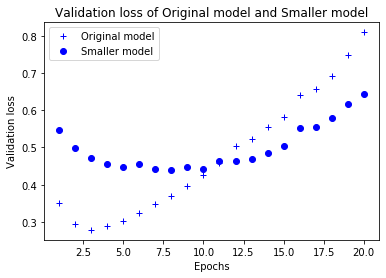

In [8]:
# Plot the graph
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('Validation loss of Original model and Smaller model')
plt.legend()
plt.show()
# It seems that original model overfits after 6 epoches, while the smaller model overfits after 4 epoches.
# The smaller network starts overfitting later than the reference one.

In [9]:
# Introduce another very big network
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000, )))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [10]:
# Start training
bigger_model_hist = bigger_model.fit(x_train,y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test,y_test))
bigger_dict = bigger_model_hist.history
print(bigger_dict)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 18s 723us/step - loss: 0.4585 - acc: 0.7982 - val_loss: 0.3310 - val_acc: 0.8598
Epoch 2/20
25000/25000 [==============================] - 18s 718us/step - loss: 0.2213 - acc: 0.9111 - val_loss: 0.2811 - val_acc: 0.8867
Epoch 3/20
25000/25000 [==============================] - 20s 802us/step - loss: 0.1357 - acc: 0.9496 - val_loss: 0.3330 - val_acc: 0.8849
Epoch 4/20
25000/25000 [==============================] - 19s 770us/step - loss: 0.0577 - acc: 0.9811 - val_loss: 0.7984 - val_acc: 0.8192
Epoch 5/20
25000/25000 [==============================] - 19s 743us/step - loss: 0.0325 - acc: 0.9901 - val_loss: 0.5952 - val_acc: 0.8802
Epoch 6/20
25000/25000 [==============================] - 19s 755us/step - loss: 0.0988 - acc: 0.9874 - val_loss: 0.5331 - val_acc: 0.8785
Epoch 7/20
25000/25000 [==============================] - 18s 725us/step - loss: 9.4543e-04 - acc: 1.0000 - val_loss

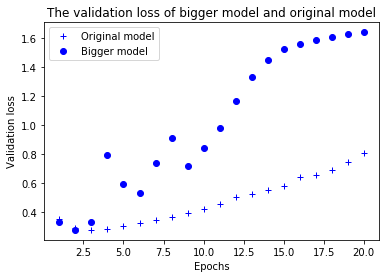

In [11]:
bigger_val_loss = bigger_dict['val_loss']
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.title('The validation loss of bigger model and original model')
plt.legend()
plt.show()
# The bigger network starts overfitting after one epoch, and overfits much more severely.

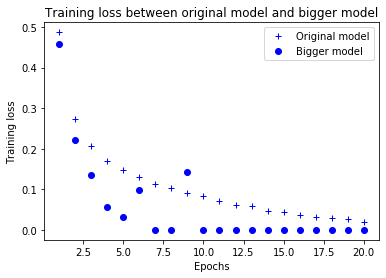

In [13]:
# Plot the training loss
original_train_loss = original_hist.history['loss']
bigger_train_loss = bigger_dict['loss']
plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_train_loss, 'bo', label='Bigger model')
plt.title('Training loss between original model and bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()
plt.show()
# The bigger network gets its training loss near zero very quickly.
# The more capacity the network has, the quickier it will be able to model the training data.
# But the more susceptible it is to overfitting.

In [14]:
# Approach 2: Adding weight regularization
from keras import regularizers
l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000, )))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [16]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 161us/step - loss: 0.5018 - acc: 0.8179 - val_loss: 0.3836 - val_acc: 0.8815
Epoch 2/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.3177 - acc: 0.9059 - val_loss: 0.3328 - val_acc: 0.8899
Epoch 3/20
25000/25000 [==============================] - 4s 154us/step - loss: 0.2686 - acc: 0.9207 - val_loss: 0.3301 - val_acc: 0.8888
Epoch 4/20
25000/25000 [==============================] - 3s 134us/step - loss: 0.2489 - acc: 0.9293 - val_loss: 0.3417 - val_acc: 0.8827
Epoch 5/20
25000/25000 [==============================] - 3s 122us/step - loss: 0.2356 - acc: 0.9331 - val_loss: 0.3381 - val_acc: 0.8856
Epoch 6/20
25000/25000 [==============================] - 3s 131us/step - loss: 0.2296 - acc: 0.9356 - val_loss: 0.3510 - val_acc: 0.8803
Epoch 7/20
25000/25000 [==============================] - 3s 139us/step - loss: 0.2209 - acc: 0.9393 - val_loss: 0.3543 - 

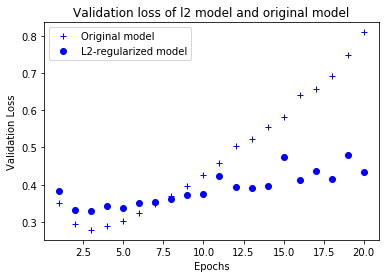

In [19]:
# Plot the validation loss of l2 model and original model
l2_model_val_loss = l2_model_hist.history['val_loss']
original_model_val_loss = original_hist.history['val_loss']
plt.plot(epochs, original_model_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation loss of l2 model and original model')
plt.legend()
plt.show()
# The model with L2 regularization has become much more 

In [20]:
# Alternatives to L2 regularization
'''
from keras import regularizers
# L1 regularization
regularizers.l1(0.001)
# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)
'''

'\nfrom keras import regularizers\n# L1 regularization\nregularizers.l1(0.001)\n# L1 and L2 regularization at the same time\nregularizers.l1_l2(l1=0.001, l2=0.001)\n'

In [24]:
# Approach 3: Adding Dropout
dp_model = models.Sequential()
dp_model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
dp_model.add(layers.Dropout(0.5))
dp_model.add(layers.Dense(16, activation='relu'))
dp_model.add(layers.Dropout(0.5))
dp_model.add(layers.Dense(1, activation='sigmoid'))

dp_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [25]:
dp_model_hist = dp_model.fit(x_train,y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 166us/step - loss: 0.6104 - acc: 0.6617 - val_loss: 0.4764 - val_acc: 0.8602
Epoch 2/20
25000/25000 [==============================] - 3s 139us/step - loss: 0.4635 - acc: 0.7989 - val_loss: 0.3516 - val_acc: 0.8798
Epoch 3/20
25000/25000 [==============================] - 3s 138us/step - loss: 0.3706 - acc: 0.8555 - val_loss: 0.3010 - val_acc: 0.8878
Epoch 4/20
25000/25000 [==============================] - 4s 153us/step - loss: 0.3079 - acc: 0.8884 - val_loss: 0.2781 - val_acc: 0.8884
Epoch 5/20
25000/25000 [==============================] - 3s 140us/step - loss: 0.2705 - acc: 0.9062 - val_loss: 0.2774 - val_acc: 0.8881
Epoch 6/20
25000/25000 [==============================] - 4s 158us/step - loss: 0.2398 - acc: 0.9191 - val_loss: 0.2851 - val_acc: 0.8872
Epoch 7/20
25000/25000 [==============================] - 4s 143us/step - loss: 0.2159 - acc: 0.9275 - val_loss: 0.2984 - 

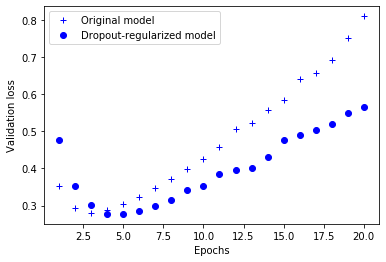

In [26]:
# Compare the validation loss with dropout and original model.
epochs = range(1, 21)
original_model_val_loss = original_hist.history['val_loss']
dp_model_val_loss = dp_model_hist.history['val_loss']
plt.plot(epochs, original_model_val_loss, 'b+', label='Original model')
plt.plot(epochs, dp_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

In [ ]:
# 4-common ways to prevent overfitting in neural networks
# 1. Getting more training data
# 2. Reducing the capacity of the network
# 3. Adding weight regularization
# 4. Adding dropout.